In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

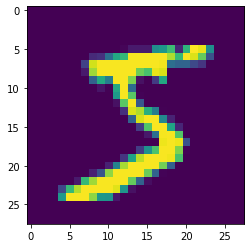

In [4]:
plt.imshow(X_train[0])

In [6]:
X_train=X_train/255

In [7]:
X_test=X_test/255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [9]:
X_train[0].shape

(28, 28)

In [10]:
encoder= Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [11]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [12]:
autoencoder = Sequential([encoder,decoder])

In [13]:
autoencoder.compile(loss='binary_crossentropy',
                   optimizer=SGD(lr=1.5),
                   metrics=['accuracy'])

In [14]:
autoencoder.fit(X_train,X_train,epochs=5,
                validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 28s 467us/sample - loss: 0.2498 - accuracy: 0.7912 - val_loss: 0.2012 - val_accuracy: 0.7934
Epoch 2/5
60000/60000 [==============================] - 28s 462us/sample - loss: 0.1797 - accuracy: 0.7985 - val_loss: 0.1650 - val_accuracy: 0.8011
Epoch 3/5
60000/60000 [==============================] - 26s 427us/sample - loss: 0.1571 - accuracy: 0.8027 - val_loss: 0.1522 - val_accuracy: 0.8008
Epoch 4/5
60000/60000 [==============================] - 22s 360us/sample - loss: 0.1467 - accuracy: 0.8045 - val_loss: 0.1457 - val_accuracy: 0.8027
Epoch 5/5
60000/60000 [==============================] - 22s 366us/sample - loss: 0.1393 - accuracy: 0.8060 - val_loss: 0.1371 - val_accuracy: 0.8065


In [15]:
passed_images = autoencoder.predict(X_test[:10])

Original Image


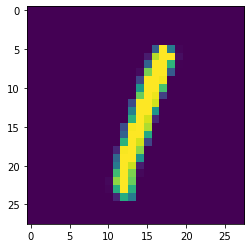

Attempted Reconstruction (after autoencoder)


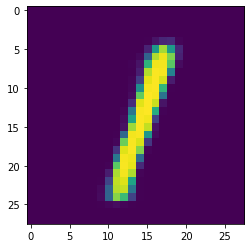

In [18]:
n=5

print("Original Image")
plt.imshow(X_test[n])
plt.show()
print('Attempted Reconstruction (after autoencoder)')
plt.imshow(passed_images[n])

In [19]:
from tensorflow.keras.layers import GaussianNoise

In [20]:
sample = GaussianNoise(0.2)

In [21]:
noisey = sample(X_test[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



ORIGINAL


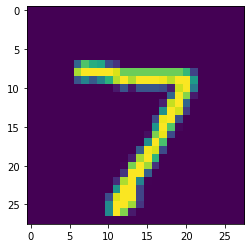

NOISE VERSION


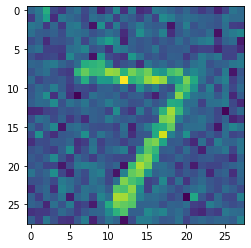

In [22]:
n = 0
print("ORIGINAL")
plt.imshow(X_test[n])
plt.show()
print("NOISE VERSION")
plt.imshow(noisey[n])
plt.show()

In [23]:
import tensorflow as tf

In [25]:
tf.random.set_seed(101)
np.random.seed(101)

encoder= Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [26]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [27]:
noise_remover = Sequential([encoder,decoder])

In [28]:
noise_remover.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [29]:
noise_remover.fit(X_train,X_train,epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 39s 645us/sample - loss: 0.1713 - accuracy: 0.8011
Epoch 2/8
60000/60000 [==============================] - 37s 621us/sample - loss: 0.1297 - accuracy: 0.8080
Epoch 3/8
60000/60000 [==============================] - 34s 562us/sample - loss: 0.1217 - accuracy: 0.8094
Epoch 4/8
60000/60000 [==============================] - 29s 483us/sample - loss: 0.1168 - accuracy: 0.8103
Epoch 5/8
60000/60000 [==============================] - 29s 482us/sample - loss: 0.1124 - accuracy: 0.8110
Epoch 6/8
60000/60000 [==============================] - 29s 487us/sample - loss: 0.1090 - accuracy: 0.8115
Epoch 7/8
60000/60000 [==============================] - 29s 491us/sample - loss: 0.1068 - accuracy: 0.8119
Epoch 8/8
60000/60000 [==============================] - 30s 499us/sample - loss: 0.1052 - accuracy: 0.8121


In [30]:
ten_noisey_images = sample(X_test[:10],training=True)

In [33]:
denoised = noise_remover(ten_noisey_images)

ORIGINAL IMAGE


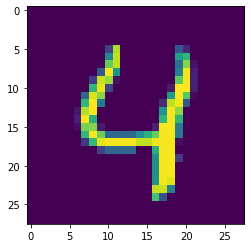

NOISE ADDED IMAGE


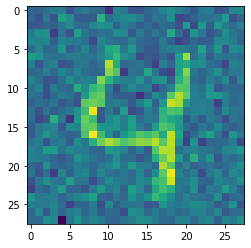

AFTER NOISE REMOVAL FROM AUTOENCODER


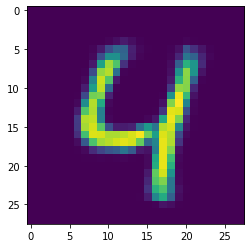

In [36]:
n=4
print("ORIGINAL IMAGE")
plt.imshow(X_test[n])
plt.show()
print("NOISE ADDED IMAGE")
plt.imshow(ten_noisey_images[n])
plt.show()
print("AFTER NOISE REMOVAL FROM AUTOENCODER")
plt.imshow(denoised[n])
plt.show()